In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import csv
import gzip
import os
import scipy.io
import seaborn as sns
import scipy
from statannot import add_stat_annotation
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/maayanbaron/Documents/Data/desmosomes/MKT_ST/All Data WTA.xlsx'
expression = pd.read_excel(path,sheet_name='Area Norm',index_col=0)
ROI_info = pd.read_excel(path,sheet_name=0,index_col=4)

In [3]:
#fix ROI index to match expression
new_idx = []
for idx in ROI_info.index:
    new_name = ('|').join(idx.split(' | '))
    new_name = ('.').join(new_name.split(' '))
    new_name = (' ').join(new_name.split('.',1))
    new_idx.append(new_name)
    
ROI_info.index=new_idx

In [4]:
#adding tumor information for each ROI
ROI_info['TumorID']=''
ROI_info.iloc[0:8,-1]='MKD1'
ROI_info.iloc[8:12,-1]='MKD2'
ROI_info.iloc[12:18,-1]='MKD3'
ROI_info.iloc[18:24,-1]='MKD5'
ROI_info.iloc[24:32,-1]='MKD4'
ROI_info.iloc[32:35,-1]='MKD6'
ROI_info.iloc[36:42,-1]='MKD7'
ROI_info.iloc[42:48,-1]='MKD8'

In [5]:
#adding ROI information for each ROI
ROI_info['ROItype']='krt+mela'
krt_index = [0,1,5,9,14,16,17,21,28,29,31,35,38,44,45]
mela_index = [3,6,7,10,11,12,15,18,22,24,25,26,32,33,36,37,39,42,43,46,47]
ROI_info.iloc[krt_index,-1]='krt'
ROI_info.iloc[mela_index,-1]='mela'

In [6]:
#adding des mutation information for each ROI
ROI_info['des_status']='WT'
#mut_index = [0,1,2,3,4,5,6,7,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
mut_index = [0,1,2,3,4,5,6,7,18,19,20,21,22,23,32,33,34,35]
ROI_info.iloc[mut_index,-1]='MUT'

In [7]:
ROI_info.head()
ROI_info['des_count']=0
ROI_info.loc[ROI_info['TumorID']=='MKD1','des_count']=16
ROI_info.loc[ROI_info['TumorID']=='MKD2','des_count']=7
ROI_info.loc[ROI_info['TumorID']=='MKD3','des_count']=8
ROI_info.loc[ROI_info['TumorID']=='MKD4','des_count']=12
ROI_info.loc[ROI_info['TumorID']=='MKD5','des_count']=14
ROI_info.loc[ROI_info['TumorID']=='MKD6','des_count']=15
ROI_info.loc[ROI_info['TumorID']=='MKD7','des_count']=10
ROI_info.loc[ROI_info['TumorID']=='MKD8''des_count']=6

In [8]:
#adding distance from melano krt ROI
ROI_info['melano_distance']=''
close_index = [0,1,9,16,21,22,28,29,38,45]
far_index = [5,14,17,31,34,35,44]
ROI_info.iloc[close_index,-1]='close'
ROI_info.iloc[far_index,-1]='far'
ROI_info.head()

,SlideName,ScanLabel,ROILabel,SegmentLabel,QCFlags,AOISurfaceArea,AOINucleiCount,ROICoordinateX,ROICoordinateY,RawReads,...,DeduplicatedReads,TrimmedReads,StitchedReads,SequencingSaturation,LOQ.(Dev.Commercial.Human.WTA),TumorID,ROItype,des_status,des_count,melano_distance
MKD 1_2|001|Geometric.Segment,MKD 1_2,MKD 1_2,1,Geometric Segment,NaN,31273.2,239,14386.0,63497.3,5963994,...,526467,5831728,5798575,91.2,21.4,MKD1,krt,MUT,16,close
MKD 1_2|002|Geometric.Segment,MKD 1_2,MKD 1_2,2,Geometric Segment,NaN,38118.5,145,11835.7,56709.6,5649208,...,435875,5633094,5600887,92.3,20.4,MKD1,krt,MUT,16,close
MKD 1_2|003|Geometric.Segment,MKD 1_2,MKD 1_2,3,Geometric Segment,NaN,48418.1,369,13124.2,61508.3,945085,...,469571,942830,933969,50.3,21.5,MKD1,krt+mela,MUT,16,
MKD 1_2|004|Geometric.Segment,MKD 1_2,MKD 1_2,4,Geometric Segment,NaN,31273.2,262,14221.1,64171.4,4222592,...,426205,4208591,4183434,89.9,18.6,MKD1,mela,MUT,16,
MKD 1_2|005|Geometric.Segment,MKD 1_2,MKD 1_2,5,Geometric Segment,NaN,39245.3,334,15155.9,67468.0,12646260,...,642541,12598115,12535241,94.9,30.9,MKD1,krt+mela,MUT,16,


In [9]:
def medianNormalize(X):
    num_transcripts = np.sum(X, axis=0)
    X_norm = (np.median(num_transcripts) / num_transcripts) * X
    X_norm = (np.median(num_transcripts) / num_transcripts) * X
    return X_norm

def freemanTukeyTransform(X):
    return np.sqrt(X) + np.sqrt(X+1)

In [10]:
exp_tpm = medianNormalize(expression)
exp_tpm = exp_tpm/np.sum(exp_tpm)*10000
exp_ft = freemanTukeyTransform(exp_tpm)
exp_log = np.log10(1+exp_tpm)

In [11]:
from scipy import stats
exp_z = pd.DataFrame(data=stats.zscore(exp_tpm,axis=1),index=exp_tpm.index,columns=exp_tpm.columns)

In [14]:
#write out expression for Rudi's to process for network analysis
#list_of_genes = ['KRT14','DSP','DSC1','DSC2','DSC3','DSG1','DSG2','DSG3','DSG4','PKP1','PKP2', 'PKP3','JUP',
#                'S100B','SOX2','SOX10','CD74','PMEL','DCT','TYR','FOS','JUN','CD4','SOX4', 'KRT5','CD9']
exp_for_rudi_tpm = pd.concat([exp_tpm.T,pd.concat([ROI_info['ROItype'],ROI_info['des_status']],axis=1)],axis=1)
exp_for_rudi_mean_tpm = exp_for_rudi_tpm.groupby(['ROItype','des_status']).mean()
list_of_genes = exp_for_rudi_mean_tpm.mean()>exp_for_rudi_mean_tpm.mean().mean()
list_of_genes = list_of_genes[list_of_genes==True]

exp_for_rudi_tpm = pd.concat([exp_tpm.loc[list_of_genes.index].T,pd.concat([ROI_info['ROItype'],ROI_info['des_status']],axis=1)],axis=1)
exp_for_rudi_mean_tpm = exp_for_rudi_tpm.groupby(['ROItype','des_status']).mean()
exp_for_rudi_mean_tpm['sample_count'] = exp_for_rudi_mean_tpm.groupby(['ROItype','des_status']).count().iloc[:,0]
exp_for_rudi_mean_melt_tpm = pd.melt(exp_for_rudi_mean_tpm,ignore_index=False,id_vars='sample_count').reset_index()
exp_for_rudi_mean_melt_tpm.columns = ['cell_type','mutation_status','num_of_samples','gene','expression']
exp_for_rudi_mean_melt_tpm.loc[exp_for_rudi_mean_melt_tpm['mutation_status']=='WT','mutation_status'] = 'False'
exp_for_rudi_mean_melt_tpm.loc[exp_for_rudi_mean_melt_tpm['mutation_status']=='MUT','mutation_status'] = 'True'

exp_for_rudi = pd.concat([exp_z.loc[list_of_genes.index].T,pd.concat([ROI_info['ROItype'],ROI_info['des_status']],axis=1)],axis=1)
exp_for_rudi_mean = exp_for_rudi.groupby(['ROItype','des_status']).mean()
exp_for_rudi_mean['sample_count'] = exp_for_rudi.groupby(['ROItype','des_status']).count().iloc[:,0]
exp_for_rudi_mean_melt = pd.melt(exp_for_rudi_mean,ignore_index=False,id_vars='sample_count').reset_index()
exp_for_rudi_mean_melt.columns = ['cell_type','mutation_status','num_of_samples','gene','expression']
exp_for_rudi_mean_melt.loc[exp_for_rudi_mean_melt['mutation_status']=='WT','mutation_status'] = 'False'
exp_for_rudi_mean_melt.loc[exp_for_rudi_mean_melt['mutation_status']=='MUT','mutation_status'] = 'True'

exp_for_rudi_mean_melt = exp_for_rudi_mean_melt[['gene','cell_type','num_of_samples','expression','mutation_status']]
exp_for_rudi_mean_melt['ratio']=0
list_of_cell_types = exp_for_rudi_mean_melt['cell_type'].unique()
for gene in list_of_genes.index:
    for cell_type in list_of_cell_types:
        idx = np.logical_and(exp_for_rudi_mean_melt_tpm['gene']==gene,exp_for_rudi_mean_melt_tpm['cell_type']==cell_type)
        df = exp_for_rudi_mean_melt_tpm[idx]
        exp_for_rudi_mean_melt.loc[idx[idx==True].index,'ratio'] = df['expression'].iloc[1]/df['expression'].iloc[0]
        
exp_for_rudi_mean_melt['ratio_log2'] = np.log2(exp_for_rudi_mean_melt['ratio'])

exp_for_rudi_mean_melt = exp_for_rudi_mean_melt[exp_for_rudi_mean_melt['mutation_status']=='False']
exp_for_rudi_mean_melt = exp_for_rudi_mean_melt[exp_for_rudi_mean_melt['cell_type']!='krt+mela'] #remove krt+mela cell type
exp_for_rudi_mean_melt = exp_for_rudi_mean_melt[exp_for_rudi_mean_melt['ratio']!=0]
upper_thresh=1.8
lower_thresh=0.7
df_genes = exp_for_rudi_mean_melt.loc[np.logical_or(exp_for_rudi_mean_melt['ratio']>upper_thresh,exp_for_rudi_mean_melt['ratio']<lower_thresh),'gene'].to_list()

exp_for_rudi_mean_melt = exp_for_rudi_mean_melt[exp_for_rudi_mean_melt['gene'].isin(df_genes)]
exp_for_rudi_mean_melt.to_csv('forRudi/ST_filtered_genes.tsv',sep='\t',index=False)

In [12]:
#select for dynamic genes
fano_factor=np.var(exp_tpm,axis=1)/np.mean(exp_tpm,axis=1)
mean_exp=np.mean(exp_tpm,axis=1)
thresh=0
dyn_genes=np.logical_and(fano_factor>np.mean(fano_factor)+thresh*np.std(fano_factor),
               mean_exp>np.mean(mean_exp)+thresh*np.std(mean_exp))

print(np.sum(dyn_genes))

1104


In [13]:
#write out expression for cibersortx - only dynamic genes

exp_for_cibersort = pd.concat([exp_tpm.loc[dyn_genes].T,pd.concat([ROI_info['ROItype'],ROI_info['des_status']],axis=1)],axis=1)
exp_for_cibersort = exp_for_rudi_tpm.groupby(['ROItype','des_status']).mean()
exp_for_cibersort.head()


#exp_for_rudi_mean_melt.to_csv('forRudi/ST_subsetV4.tsv',sep='\t',index=False)

NameError: name 'exp_for_rudi_tpm' is not defined

In [14]:
#Perform PCA
from sklearn.decomposition import PCA
num_components = 10

pca_model = PCA(
    n_components=num_components)

pc_scores = pca_model.fit_transform(exp_ft.loc[dyn_genes].T).T

print('The first %d PCs explain %.1f %% of the total variance.'
      % (num_components, 100*pca_model.explained_variance_ratio_.sum()))

The first 10 PCs explain 91.9 % of the total variance.


In [29]:
exp_ft

,MKD 1_2|001|Geometric.Segment,MKD 1_2|002|Geometric.Segment,MKD 1_2|003|Geometric.Segment,MKD 1_2|004|Geometric.Segment,MKD 1_2|005|Geometric.Segment,MKD 1_2|006|Geometric.Segment,MKD 1_2|007|Geometric.Segment,MKD 1_2|008|Geometric.Segment,MKD 1_2|009|Geometric.Segment,MKD 1_2|010|Geometric.Segment,...,MKD 7_8|003|Geometric.Segment,MKD 7_8|004|Geometric.Segment,MKD 7_8|005|Geometric.Segment,MKD 7_8|006|Geometric.Segment,MKD 7_8|007|Geometric.Segment,MKD 7_8|008|Geometric.Segment,MKD 7_8|009|Geometric.Segment,MKD 7_8|010|Geometric.Segment,MKD 7_8|011|Geometric.Segment,MKD 7_8|012|Geometric.Segment
TargetName,,,,,,,,,,,,,,,,,,,,,
A1BG,1.429782,1.438532,1.333921,1.695714,1.417627,1.525906,1.522100,1.344644,1.567647,1.502651,...,1.282237,1.410355,1.421776,1.349394,1.318863,1.287268,1.483991,1.323644,1.513237,1.365386
A1CF,1.614443,1.478887,1.714840,1.560917,1.417627,1.608699,1.389746,1.568581,1.536967,1.549689,...,1.354142,1.586078,1.629645,1.693120,1.498864,1.535560,1.599015,1.479428,1.570455,1.581925
A2M,1.641758,1.717451,1.796550,1.726885,1.731475,1.621687,2.187391,2.090744,3.627602,1.861010,...,1.666270,2.054525,2.404871,1.693120,10.097104,9.362369,1.923306,1.777317,9.554622,9.501225
A2ML1,2.470252,3.334012,2.206477,1.523806,2.137897,2.422952,1.712128,1.647764,1.707063,3.372445,...,3.575017,1.559273,2.386333,2.632491,1.400700,1.488135,4.435331,5.322839,1.513237,1.688776
A3GALT2,1.393670,1.438532,1.458816,1.400175,1.387134,1.540160,1.551805,1.621939,1.318660,1.549689,...,1.386285,1.503212,1.460673,1.349394,1.458393,1.382575,1.305832,1.498677,1.429481,1.338959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,1.668347,1.478887,1.284355,1.485152,1.552169,1.481033,1.661432,1.449812,1.472136,1.593908,...,1.550755,1.442664,1.532329,1.518737,1.664612,1.623056,1.419257,1.438926,1.754963,1.581925
ZYG11B,1.989037,1.717451,1.714840,2.099539,1.771804,1.854998,1.736465,1.721171,1.680570,1.502651,...,1.500019,1.862092,1.629645,1.657105,1.653660,1.683704,1.625599,1.498677,1.770155,1.846675
ZYX,2.253552,2.037717,2.080997,2.027190,2.058228,2.062632,2.038245,2.297253,2.088877,1.826242,...,2.805440,2.473922,2.901317,2.913706,3.638789,3.723363,3.264716,2.512517,3.559826,2.715881


In [15]:
pc_labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
df_pc_scores = pd.DataFrame(data=pc_scores,index=pc_labels)
df_pc_scores.columns = ROI_info.index

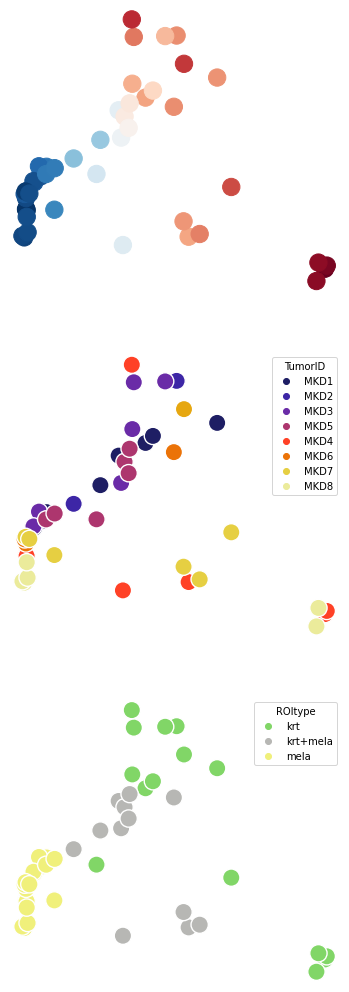

In [16]:
gene_list = sorted(['DSG2','DSG3','DSG4','DSC1','DSC2','PKP1','PKP3','PKP2','DSG1','DSC3','DSP'])
size=300

plt.figure(figsize=(6,18))
plt.subplot(3,1,1)
plt.scatter(x=df_pc_scores.loc['PC1'],y=df_pc_scores.loc['PC2'],cmap='RdBu_r',
        c=exp_log.loc[gene_list].sum(),s=size);
plt.axis('off');
#plt.title('Desmosome subcomplex');
#plt.colorbar(shrink=0.5);

plt.subplot(3,1,2)
sns.scatterplot(x=df_pc_scores.loc['PC1'],y=df_pc_scores.loc['PC2'],
        hue=ROI_info['TumorID'],s=size,palette='CMRmap')
#                hue_order=['MKD1','MKD2','MKD3','MKD4','MKD5','MKD6','MKD7','MKD8'],s=size,palette='CMRmap');
plt.axis('off');

colors = ["#81d667", "#B7B7B4" ,"#f0f07b"]
plt.subplot(3,1,3)
sns.scatterplot(x=df_pc_scores.loc['PC1'],y=df_pc_scores.loc['PC2'],
        hue=ROI_info['ROItype'],s=size,palette=colors);
plt.axis('off');
#plt.savefig('PCA.pdf',dpi=600,bbox_inches='tight')

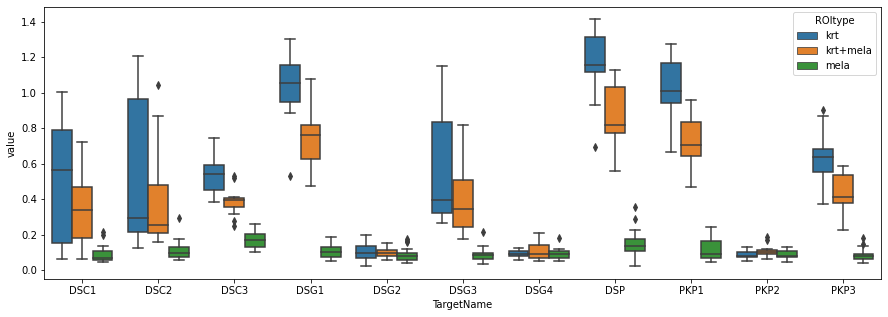

In [20]:
df = exp_log.loc[gene_list].reset_index()
df = df.melt(id_vars = ['TargetName'])
df = pd.merge(df,ROI_info['ROItype'],left_on='variable',right_index=True)
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='TargetName',y='value',hue='ROItype');

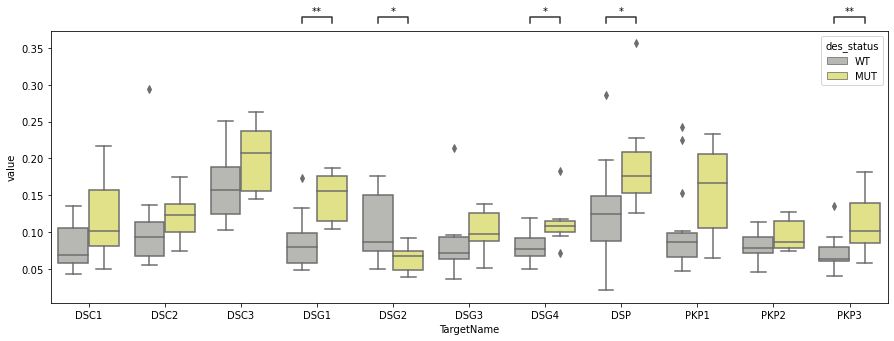

In [21]:
df = exp_log.loc[gene_list].reset_index()
df = df.melt(id_vars = ['TargetName'])
df = pd.merge(df,ROI_info['ROItype'],left_on='variable',right_index=True)
df = df[df['ROItype']=='mela']
df= pd.merge(df,ROI_info['des_status'],left_on='variable',right_index=True)

x='TargetName'
y='value'
hue='des_status'
hue_order =['WT','MUT']
box_pairs = [
    (("DSC1", "WT"), ("DSC1", "MUT")),
    (("DSC3", "WT"), ("DSC3", "MUT")),
    (("DSC2", "WT"), ("DSC2", "MUT")),
    (("DSG1", "WT"), ("DSG1", "MUT")),
    (("DSG2", "WT"), ("DSG2", "MUT")),
    (("DSG3", "WT"), ("DSG3", "MUT")),
    (("DSG4", "WT"), ("DSG4", "MUT")),
    (("DSP", "WT"), ("DSP", "MUT")),
    (("PKP1", "WT"), ("PKP1", "MUT")),
    (("PKP2", "WT"), ("PKP2", "MUT")),
    (("PKP3", "WT"), ("PKP3", "MUT"))]

box_pairs = [
    (("DSG1", "WT"), ("DSG1", "MUT")),
    (("DSG2", "WT"), ("DSG2", "MUT")),
    (("DSG4", "WT"), ("DSG4", "MUT")),
    (("DSP", "WT"), ("DSP", "MUT")),
    (("PKP3", "WT"), ("PKP3", "MUT"))]

plt.figure(figsize=(15,5))
colors = ["#B7B7B4","#f0f07b"]
ax = sns.boxplot(data=df,x=x,y=y,hue=hue,palette=colors,hue_order=hue_order);
test_results = add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star',comparisons_correction=None,
                                   loc='outside', verbose=0)
plt.savefig('des_expression_boxplot_MUT_WT_melano.pdf',dpi=600,bbox_inches='tight')

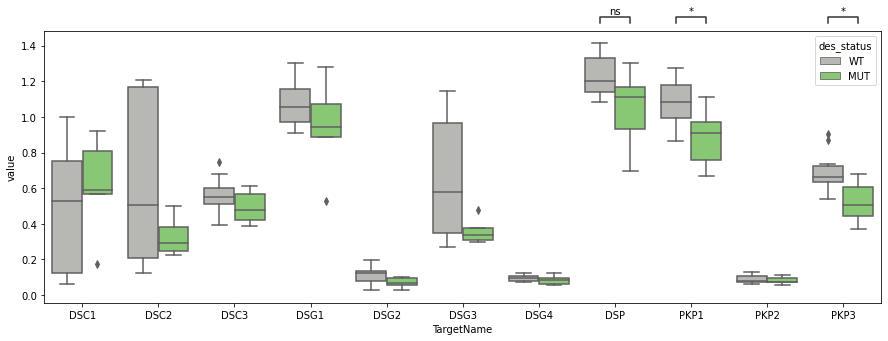

In [22]:
df = exp_log.loc[gene_list].reset_index()
df = df.melt(id_vars = ['TargetName'])
df = pd.merge(df,ROI_info['ROItype'],left_on='variable',right_index=True)
df = df[df['ROItype']=='krt']
df= pd.merge(df,ROI_info['des_status'],left_on='variable',right_index=True)

x='TargetName'
y='value'
hue='des_status'
hue_order =['WT','MUT']
box_pairs = [
    (("DSC1", "WT"), ("DSC1", "MUT")),
    (("DSC3", "WT"), ("DSC3", "MUT")),
    (("DSC2", "WT"), ("DSC2", "MUT")),
    (("DSG1", "WT"), ("DSG1", "MUT")),
    (("DSG2", "WT"), ("DSG2", "MUT")),
    (("DSG3", "WT"), ("DSG3", "MUT")),
    (("DSG4", "WT"), ("DSG4", "MUT")),
    (("DSP", "WT"), ("DSP", "MUT")),
    (("PKP1", "WT"), ("PKP1", "MUT")),
    (("PKP2", "WT"), ("PKP2", "MUT")),
    (("PKP3", "WT"), ("PKP3", "MUT"))]

box_pairs = [
    (("DSP", "WT"), ("DSP", "MUT")),
    (("PKP3", "WT"), ("PKP3", "MUT")),
    (("PKP1", "WT"), ("PKP1", "MUT"))]

plt.figure(figsize=(15,5))
colors = ["#B7B7B4","#81d667"]
ax = sns.boxplot(data=df,x=x,y=y,hue=hue,palette=colors,hue_order=hue_order);
test_results = add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,comparisons_correction=None,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=0)
plt.savefig('des_expression_boxplot_MUT_WT_krt.pdf',dpi=600,bbox_inches='tight')

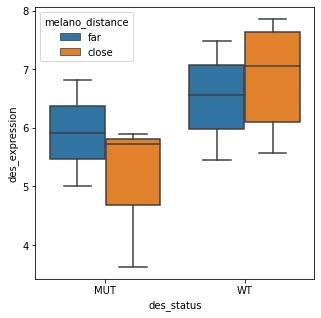

In [23]:
df = exp_log.loc[gene_list].reset_index()
#df = df.melt(id_vars = ['TargetName'])
df = pd.concat([pd.concat([df.sum(),ROI_info['ROItype']],axis=1),ROI_info['des_status']],axis=1)
df = df[df['ROItype']=='krt']
df= pd.merge(df,ROI_info['melano_distance'],left_index=True,right_index=True)
df = df.rename(columns={0: "des_expression"})

y='des_expression'
hue='melano_distance'
x='des_status'
hue_order = ['far','close']
box_pairs = [
    (("MUT","far"), ( "MUT","close"))]

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df,x=x,y=y,hue=hue,hue_order=hue_order);
#test_results = add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,
#                                   box_pairs=box_pairs,
#                                   test='Levene', text_format='star',comparisons_correction=None,
#                                   loc='outside', verbose=1)

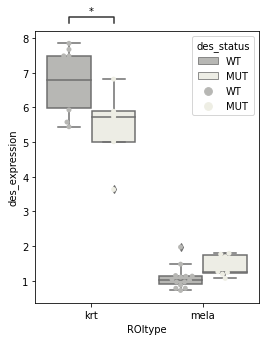

In [21]:
df = exp_log.loc[gene_list]
df = pd.concat([pd.concat([df.sum(),ROI_info['ROItype']],axis=1),ROI_info['des_status']],axis=1)
df = df.rename(columns={0: "des_expression"})
df = df.drop(df[df['ROItype']=='krt+mela'].index)
#df = df.drop(df[df['ROItype']=='mela'].index)


plt.figure(figsize=(4,5))
x = 'ROItype'
y = 'des_expression'
hue = 'des_status'
hue_order = ['WT','MUT']
box_pairs = [
    (("krt", "WT"), ("krt", "MUT")),
    (("mela", "WT"), ("mela", "MUT"))]
box_pairs = [
    (("krt", "WT"), ("krt", "MUT"))]

colors = ["#B7B7B4","#eeeee4"]

ax = sns.boxplot(data=df,hue=hue,y=y,x=x,hue_order=hue_order,palette=colors);
ax = sns.swarmplot(data=df,hue=hue,y=y,x=x,hue_order=hue_order,palette=colors,dodge=True);
test_results = add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star',comparisons_correction=None,
                                   loc='outside', verbose=0)
#plt.savefig('des_expression_boxplot_WT_Mut_mel_krt.pdf',dpi=600,bbox_inches='tight')

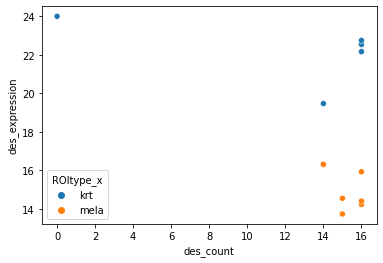

In [83]:
df_mut_count = pd.merge(df,ROI_info,left_index=True,right_index=True)

data = df_mut_count[df_mut_count['des_status_x']=='MUT']
x = 'des_count'
y = 'des_expression'
hue = 'ROItype_x'
sns.scatterplot(data=data,x=x,y=y,hue=hue);

In [74]:
df.head()

,des_expression,ROItype,des_status
MKD 1_2|001|Geometric.Segment,22.542513,krt,MUT
MKD 1_2|002|Geometric.Segment,22.749045,krt,MUT
MKD 1_2|004|Geometric.Segment,15.923816,mela,MUT
MKD 1_2|006|Geometric.Segment,22.168489,krt,MUT
MKD 1_2|007|Geometric.Segment,14.227353,mela,MUT


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MUT v.s. WT: t-test independent samples, P_val=6.473e-01 stat=-4.717e-01


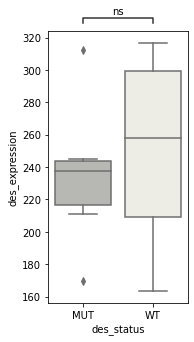

In [53]:
df = exp_ft.loc[gene_list]
df = pd.concat([pd.concat([df.sum(),ROI_info['ROItype']],axis=1),ROI_info['des_status']],axis=1)
df = df.rename(columns={0: "des_expression"})
#df = df.drop(df[df['ROItype']=='krt+mela'].index)
df = df[df['ROItype']=='krt+mela']


plt.figure(figsize=(2.5,5))
x = 'des_status'
y = 'des_expression'
#hue = 'des_status'
#hue_order = ['WT','MUT']
box_pairs = [(("WT"), ("MUT"))]
colors = ["#B7B7B4","#eeeee4"]

ax = sns.boxplot(data=df,y=y,x=x,palette=colors);
test_results = add_stat_annotation(ax, data=df, x=x, y=y,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star',comparisons_correction=None,
                                   loc='outside', verbose=1)
#plt.savefig('des_expression_boxplot_WT_Mut.pdf',dpi=600,bbox_inches='tight')

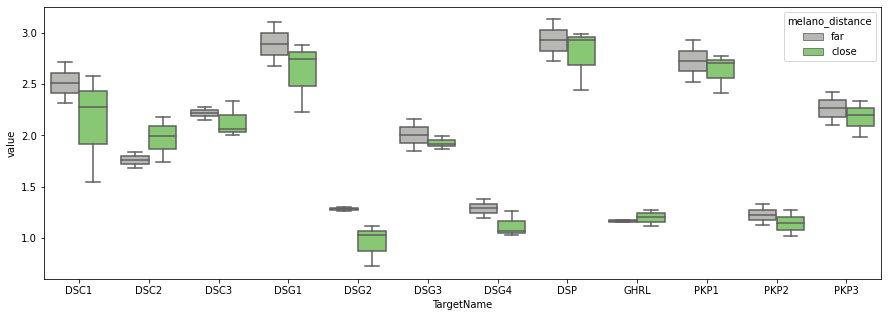

In [112]:
gene_list_ext = sorted(['DSG2','DSG3','DSG4','DSC1','DSC2','PKP1','PKP3','PKP2','DSG1','DSC3','DSP','GHRL'])
df = exp_log.loc[gene_list_ext].reset_index()
df = df.melt(id_vars = ['TargetName'])
df = pd.merge(df,ROI_info['ROItype'],left_on='variable',right_index=True)
df = pd.merge(df,ROI_info['des_status'],left_on='variable',right_index=True)

df = df[df['ROItype']=='krt']
df = df[df['des_status']=='MUT']

df= pd.merge(df,ROI_info['melano_distance'],left_on='variable',right_index=True)

plt.figure(figsize=(15,5))
x = 'TargetName'
y = 'value'
hue = 'melano_distance'
hue_order = ['far','close']

box_pairs = [
    (("DSC1", "far"), ("DSC1", "close")),
    (("DSC3", "far"), ("DSC3", "close")),
    (("DSC2", "far"), ("DSC2", "close")),
    (("DSG1", "far"), ("DSG1", "close")),
    (("DSG2", "far"), ("DSG2", "close")),
    (("DSG3", "far"), ("DSG3", "close")),
    (("DSG4", "far"), ("DSG4", "close")),
    (("DSP", "far"), ("DSP", "close")),
    (("PKP1", "far"), ("PKP1", "close")),
    (("PKP2", "far"), ("PKP2", "close")),
    (("PKP3", "far"), ("PKP3", "close")),
    (("GHRL", "far"), ("GHRL", "close"))]

colors = ["#B7B7B4","#81d667"]
ax = sns.boxplot(data=df,x=x,y=y,hue=hue,hue_order=hue_order,palette=colors);
#test_results = add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,comparisons_correction=None,
#                                   box_pairs=box_pairs,
#                                   test='t-test_ind', text_format='star',
#                                   loc='outside', verbose=0)

In [150]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

In [151]:
from scipy import stats
rng = np.random.default_rng()

close_WT  = ROI_info[np.logical_and(ROI_info['melano_distance']=='close',ROI_info['des_status']=='WT')].index
close_MUT = ROI_info[np.logical_and(ROI_info['melano_distance']=='close',ROI_info['des_status']=='MUT')].index
exp_log.head()

df_P = pd.DataFrame(index=exp_log.index,columns=['P-value_ttest','cohen_d'])
for gene in exp_log.index:
    x = exp_log.loc[gene,close_WT]
    y = exp_log.loc[gene,close_MUT]
    df_P.loc[gene,'P-value_ttest'] = stats.ks_2samp(x,y).pvalue
    df_P.loc[gene,'cohen_d'] = cohen_d(x,y)

In [160]:
df_P[np.logical_and(df_P['P-value_ttest']<0.01,np.abs(df_P['cohen_d']>0.4))].index.to_list()

['ARL4D',
 'DCTN1',
 'DSG2',
 'DSG3',
 'EPPK1',
 'ESRP1',
 'F2RL1',
 'FAM160A1',
 'FAT1',
 'GORASP2',
 'GPR68',
 'HRAS',
 'IRAK1',
 'KLF10',
 'LTBR',
 'MAP4',
 'MARK3',
 'MDFI',
 'MEAK7',
 'NAA50',
 'NIPAL4',
 'PITHD1',
 'PSMD1',
 'SEC61G',
 'SFN',
 'SLC38A1',
 'SLC9A3R1',
 'TAF13',
 'TCP1',
 'TENT5B',
 'THBD',
 'TNFRSF21',
 'TPMT',
 'TTC22',
 'TUBB4B',
 'UGP2']

In [161]:
rng = np.random.default_rng()

far_WT  = ROI_info[np.logical_and(ROI_info['melano_distance']=='far',ROI_info['des_status']=='MUT')].index
close_MUT = ROI_info[np.logical_and(ROI_info['melano_distance']=='close',ROI_info['des_status']=='MUT')].index
exp_log.head()

df_P_farvsclose = pd.DataFrame(index=exp_log.index,columns=['P-value_ttest','cohen_d'])
for gene in exp_log.index:
    x = exp_log.loc[gene,close_WT]
    y = exp_log.loc[gene,close_MUT]
    df_P_farvsclose.loc[gene,'P-value_ttest'] = stats.ks_2samp(x,y).pvalue
    df_P_farvsclose.loc[gene,'cohen_d'] = cohen_d(x,y)

In [162]:
df_P_farvsclose[np.logical_and(df_P_farvsclose['P-value_ttest']<0.01,np.abs(df_P_farvsclose['cohen_d']>0.4))].index.to_list()

['ARL4D',
 'DCTN1',
 'DSG2',
 'DSG3',
 'EPPK1',
 'ESRP1',
 'F2RL1',
 'FAM160A1',
 'FAT1',
 'GORASP2',
 'GPR68',
 'HRAS',
 'IRAK1',
 'KLF10',
 'LTBR',
 'MAP4',
 'MARK3',
 'MDFI',
 'MEAK7',
 'NAA50',
 'NIPAL4',
 'PITHD1',
 'PSMD1',
 'SEC61G',
 'SFN',
 'SLC38A1',
 'SLC9A3R1',
 'TAF13',
 'TCP1',
 'TENT5B',
 'THBD',
 'TNFRSF21',
 'TPMT',
 'TTC22',
 'TUBB4B',
 'UGP2']

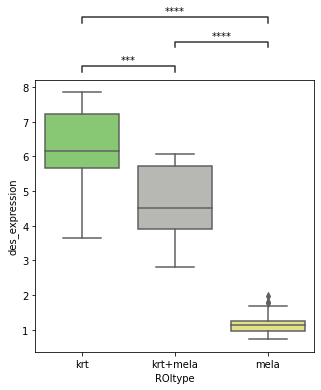

In [18]:
from scipy import stats
df = exp_log.loc[gene_list]
df_z = pd.DataFrame(data=stats.zscore(df,axis=1),index=df.index,columns=df.columns)
df_z = pd.concat([pd.concat([df.sum(),ROI_info['ROItype']],axis=1),ROI_info['des_status']],axis=1)
df_z = df_z.rename(columns={0: "des_expression"})

plt.figure(figsize=(5,5))
x = 'ROItype'
y = 'des_expression'
box_pairs = [("krt","krt+mela"), ("krt", "mela"),("krt+mela", "mela")]
colors = ["#81d667", "#B7B7B4" ,"#f0f07b"]
ax = sns.boxplot(data=df_z,y=y,x=x,palette=colors);
test_results = add_stat_annotation(ax, data=df_z, x=x, y=y,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star',comparisons_correction=None,
                                   loc='outside', verbose=0)
#plt.savefig('des_expression_boxplot.pdf',dpi=600,bbox_inches='tight')

In [22]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

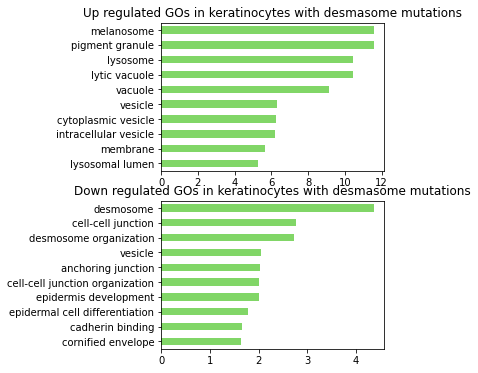

In [34]:
#look for differences in the krt besides des
from scipy import stats
exp_tpm_dyn = exp_tpm.loc[dyn_genes]

wanted_celltype = 'krt'
df_stats = pd.DataFrame(index=exp_tpm_dyn.index,columns=['pval','effect_size'])
for gene in exp_tpm_dyn.index:
    df = exp_tpm.loc[gene]
    df = pd.merge(df,ROI_info['ROItype'],left_index=True,right_index=True)
    df = df[df['ROItype']==wanted_celltype]
    df= pd.merge(df,ROI_info['des_status'],left_index=True,right_index=True)
    rvs1 = df[df['des_status']=='MUT'][gene]
    rvs2 = df[df['des_status']=='WT'][gene]
    df_stats.loc[gene,'pval'] = stats.ttest_ind(rvs1, rvs2)[1]
    df_stats.loc[gene,'effect_size'] = cohen_d(rvs1, rvs2)

from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

gene_list = df_stats[np.logical_and(df_stats['pval']<0.05,df_stats['effect_size']>0.2)].index.to_list()
enrichment_krt_up = gp.profile(organism='hsapiens',
                        query=gene_list)
enrichment_krt_up = enrichment_krt_up[enrichment_krt_up['source'].str.startswith('GO:')]
enrichment_krt_up = enrichment_krt_up.sort_values('p_value')
enrichment_to_plot = enrichment_krt_up.iloc[0:10].sort_values('p_value',ascending=False)

plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
ax = (-1*np.log10(enrichment_to_plot['p_value'])).plot.barh(color='#81d667');
labels = enrichment_to_plot['name'][0:10];
ax.set_yticklabels(labels);
plt.title('Up regulated GOs in keratinocytes with desmasome mutations');

gene_list = df_stats[np.logical_and(df_stats['pval']<0.1,df_stats['effect_size']<-0.2)].index.to_list()
enrichment_krt_down = gp.profile(organism='hsapiens',
                        query=gene_list)
enrichment_krt_down = enrichment_krt_down[enrichment_krt_down['source'].str.startswith('GO:')]
enrichment_krt_down = enrichment_krt_down.sort_values('p_value')
enrichment_to_plot = enrichment_krt_down.iloc[0:10].sort_values('p_value',ascending=False)


plt.subplot(2,1,2)
ax = (-1*np.log10(enrichment_to_plot['p_value'])).plot.barh(color='#81d667');
labels = enrichment_to_plot['name'][0:10];
ax.set_yticklabels(labels);
plt.title('Down regulated GOs in keratinocytes with desmasome mutations');
plt.savefig('GO_enrichment_krt.pdf',dpi=600,bbox_inches='tight')

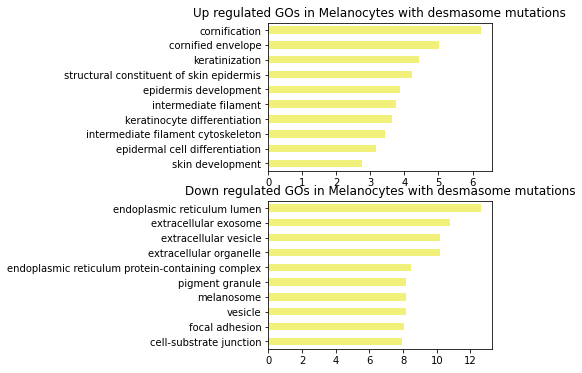

In [35]:
#look for differences in the mela besides des
from scipy import stats
exp_tpm_dyn = exp_tpm.loc[dyn_genes]

wanted_celltype = 'mela'
df_stats = pd.DataFrame(index=exp_tpm_dyn.index,columns=['pval','effect_size'])
for gene in exp_tpm_dyn.index:
    df = exp_tpm.loc[gene]
    df = pd.merge(df,ROI_info['ROItype'],left_index=True,right_index=True)
    df = df[df['ROItype']==wanted_celltype]
    df= pd.merge(df,ROI_info['des_status'],left_index=True,right_index=True)
    rvs1 = df[df['des_status']=='MUT'][gene]
    rvs2 = df[df['des_status']=='WT'][gene]
    df_stats.loc[gene,'pval'] = stats.ks_2samp(rvs1, rvs2)[1]
    df_stats.loc[gene,'effect_size'] = cohen_d(rvs1, rvs2)

from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

gene_list = df_stats[np.logical_and(df_stats['pval']<0.005,df_stats['effect_size']>0.2)].index.to_list()
enrichment_mel_up = gp.profile(organism='hsapiens',
                        query=gene_list)
enrichment_mel_up = enrichment_mel_up[enrichment_mel_up['source'].str.startswith('GO:')]
enrichment_mel_up = enrichment_mel_up.sort_values('p_value')
enrichment_to_plot = enrichment_mel_up.iloc[0:10].sort_values('p_value',ascending=False)

plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
ax = (-1*np.log10(enrichment_to_plot['p_value'])).plot.barh(color="#f0f07b");
labels = enrichment_to_plot['name'][0:10];
ax.set_yticklabels(labels);
plt.title('Up regulated GOs in Melanocytes with desmasome mutations');


gene_list = df_stats[np.logical_and(df_stats['pval']<0.05,df_stats['effect_size']<-0.2)].index.to_list()
enrichment_mel_down = gp.profile(organism='hsapiens',
                        query=gene_list)
enrichment_mel_down = enrichment_mel_down[enrichment_mel_down['source'].str.startswith('GO:')]
enrichment_mel_down = enrichment_mel_down.sort_values('p_value')
enrichment_to_plot = enrichment_mel_down.iloc[0:10].sort_values('p_value',ascending=False)

plt.subplot(2,1,2)
ax = (-1*np.log10(enrichment_to_plot['p_value'])).plot.barh(color="#f0f07b");
labels = enrichment_to_plot['name'][0:10];
ax.set_yticklabels(labels);
plt.title('Down regulated GOs in Melanocytes with desmasome mutations');
plt.savefig('GO_enrichment_mela.pdf',dpi=600,bbox_inches='tight')

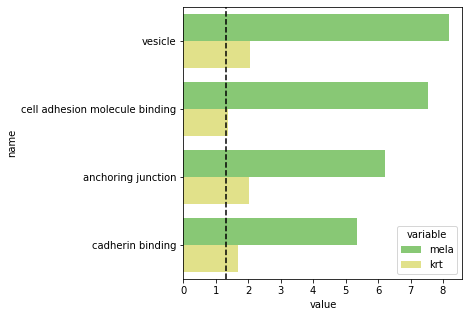

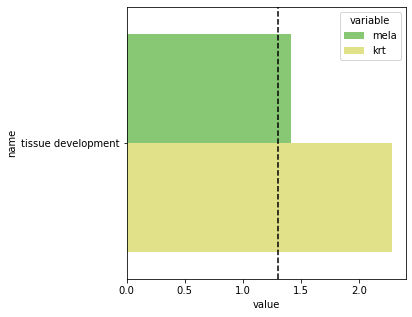

In [36]:
cols_to_keep = ['native','name','p_value']
enrichment_mel_down_small = enrichment_mel_down[cols_to_keep]
enrichment_krt_down_small = enrichment_krt_down[cols_to_keep]
enrichment_all_down_small = pd.merge(enrichment_mel_down_small,enrichment_krt_down_small,left_on='native',right_on='native')
enrichment_all_down_small = enrichment_all_down_small.drop(columns='name_y')
enrichment_all_down_small = enrichment_all_down_small.rename(columns={"name_x": "name", "p_value_x": "mela","p_value_y": "krt"})
enrichment_all_down_small = enrichment_all_down_small.iloc[0:20]
enrichment_all_down_small = enrichment_all_down_small.melt(id_vars=['native','name'])
enrichment_all_down_small['value'] = -1*np.log10(enrichment_all_down_small['value'])

colors = ["#81d667" ,"#f0f07b"]
plt.figure(figsize=(5,5))
ax = sns.barplot(data=enrichment_all_down_small,hue='variable',x='value',y='name',orient='h',palette=colors);
ax.axvline(1.3, ls='--',c='k');
plt.savefig('GO_enrichment_down.pdf',dpi=600,bbox_inches='tight')

enrichment_mel_up_small = enrichment_mel_up[cols_to_keep]
enrichment_krt_up_small = enrichment_krt_up[cols_to_keep]
enrichment_all_up_small = pd.merge(enrichment_mel_up_small,enrichment_krt_up_small,left_on='native',right_on='native')
enrichment_all_up_small = enrichment_all_up_small.drop(columns='name_y')
enrichment_all_up_small = enrichment_all_up_small.rename(columns={"name_x": "name", "p_value_x": "mela","p_value_y": "krt"})
enrichment_all_up_small = enrichment_all_up_small.iloc[0:20]
enrichment_all_up_small = enrichment_all_up_small.melt(id_vars=['native','name'])
enrichment_all_up_small['value'] = -1*np.log10(enrichment_all_up_small['value'])

plt.figure(figsize=(5,5))
ax = sns.barplot(data=enrichment_all_up_small,hue='variable',x='value',y='name',orient='h',palette=colors);
ax.axvline(1.3, ls='--',c='k');
plt.savefig('GO_enrichment_up.pdf',dpi=600,bbox_inches='tight')